In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\User\Documents\World Happiness Data'

In [7]:
df_wh2019 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'wh2019.csv'), index_col = False)

In [9]:
df_wh2019.columns

Index(['Rank', 'Country', 'Score', 'Economy', 'Social support',
       'Life_Expectancy', 'Freedom_of_choice', 'Perception_of_corruption'],
      dtype='object')

In [11]:
df_wh2019.head(10)

,Rank,Country,Score,Economy,Social support,Life_Expectancy,Freedom_of_choice,Perception_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.226


In [13]:
df_wh2019.shape

(156, 8)

C:\Users\User\AppData\Local\Temp\ipykernel_4312\1335266745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_wh2019['Life_Expectancy'], bins=20)


<Axes: xlabel='Life_Expectancy', ylabel='Density'>

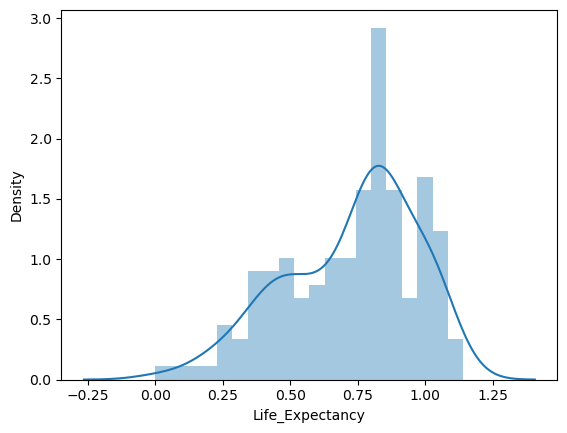

In [15]:
# Extreme value check
sns.distplot(df_wh2019['Life_Expectancy'], bins=20)

In [17]:
df_wh2019['Life_Expectancy'].mean() # Check the mean

0.7252435897435898

In [19]:
df_wh2019['Life_Expectancy'].median() # Check the median

0.789

In [23]:
df_wh2019['Life_Expectancy'].max() # Check the max

1.141

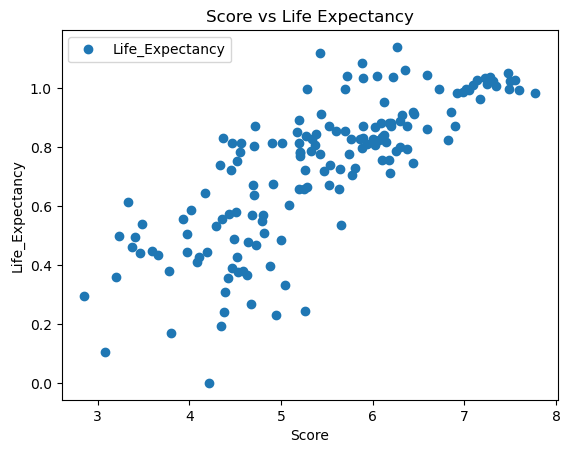

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_wh2019.plot(x = 'Score', y='Life_Expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Score vs Life Expectancy')  
plt.xlabel('Score')  
plt.ylabel('Life_Expectancy')  
plt.show()

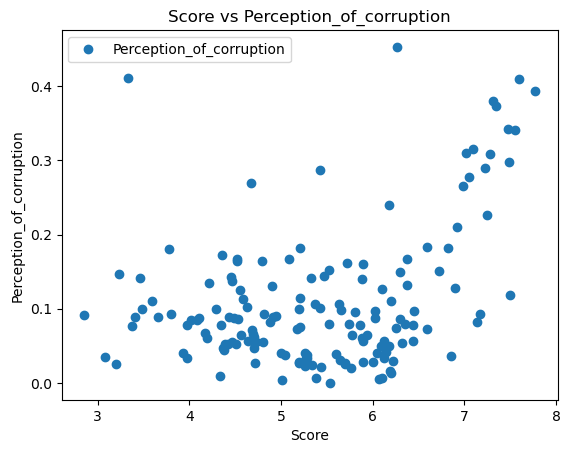

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_wh2019.plot(x = 'Score', y='Perception_of_corruption',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Score vs Perception_of_corruption')  
plt.xlabel('Score')  
plt.ylabel('Perception_of_corruption')  
plt.show()

In [31]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_wh2019['Score'].values.reshape(-1,1)
y = df_wh2019['Perception_of_corruption'].values.reshape(-1,1)

In [35]:
X

array([[7.769],
       [7.6  ],
       [7.554],
       [7.494],
       [7.488],
       [7.48 ],
       [7.343],
       [7.307],
       [7.278],
       [7.246],
       [7.228],
       [7.167],
       [7.139],
       [7.09 ],
       [7.054],
       [7.021],
       [6.985],
       [6.923],
       [6.892],
       [6.852],
       [6.825],
       [6.726],
       [6.595],
       [6.592],
       [6.446],
       [6.444],
       [6.436],
       [6.375],
       [6.374],
       [6.354],
       [6.321],
       [6.3  ],
       [6.293],
       [6.262],
       [6.253],
       [6.223],
       [6.199],
       [6.198],
       [6.192],
       [6.182],
       [6.174],
       [6.149],
       [6.125],
       [6.118],
       [6.105],
       [6.1  ],
       [6.086],
       [6.07 ],
       [6.046],
       [6.028],
       [6.021],
       [6.008],
       [5.94 ],
       [5.895],
       [5.893],
       [5.89 ],
       [5.888],
       [5.886],
       [5.86 ],
       [5.809],
       [5.779],
       [5.758],
       [

In [37]:
y

array([[0.393],
       [0.41 ],
       [0.341],
       [0.118],
       [0.298],
       [0.343],
       [0.373],
       [0.38 ],
       [0.308],
       [0.226],
       [0.29 ],
       [0.093],
       [0.082],
       [0.316],
       [0.278],
       [0.31 ],
       [0.265],
       [0.21 ],
       [0.128],
       [0.036],
       [0.182],
       [0.151],
       [0.073],
       [0.183],
       [0.097],
       [0.056],
       [0.078],
       [0.132],
       [0.167],
       [0.079],
       [0.054],
       [0.086],
       [0.15 ],
       [0.453],
       [0.074],
       [0.03 ],
       [0.11 ],
       [0.014],
       [0.016],
       [0.05 ],
       [0.24 ],
       [0.042],
       [0.034],
       [0.057],
       [0.127],
       [0.006],
       [0.05 ],
       [0.005],
       [0.041],
       [0.087],
       [0.097],
       [0.028],
       [0.064],
       [0.056],
       [0.161],
       [0.028],
       [0.06 ],
       [0.14 ],
       [0.078],
       [0.096],
       [0.064],
       [0.02 ],
       [

In [39]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [41]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

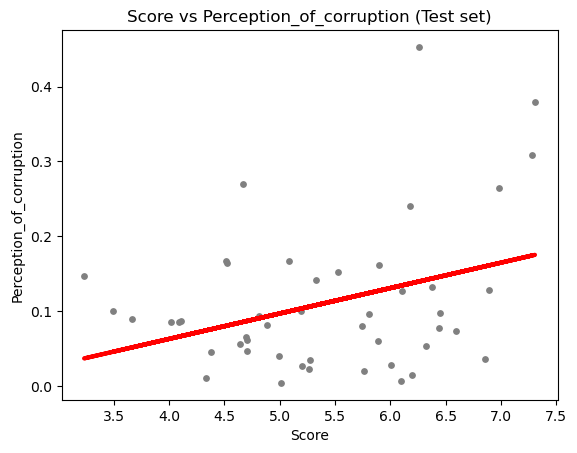

In [47]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Score vs Perception_of_corruption (Test set)')
plot_test.xlabel('Score')
plot_test.ylabel('Perception_of_corruption')
plot_test.show()

In [49]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [51]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03396141]]
Mean squared error:  0.00827695989289675
R2 score:  0.0918959837568174


In [53]:
y_predicted

array([[0.14558483],
       [0.12714378],
       [0.13750201],
       [0.08455617],
       [0.14592444],
       [0.17516522],
       [0.13417379],
       [0.08686555],
       [0.0664887 ],
       [0.13668694],
       [0.10350664],
       [0.13104934],
       [0.08662782],
       [0.08037892],
       [0.12697398],
       [0.04546658],
       [0.13967554],
       [0.0804808 ],
       [0.1343436 ],
       [0.0755564 ],
       [0.05140983],
       [0.17418034],
       [0.06336425],
       [0.12429102],
       [0.08554105],
       [0.0367385 ],
       [0.10568017],
       [0.12204957],
       [0.10612167],
       [0.09960108],
       [0.16422965],
       [0.15971278],
       [0.07413002],
       [0.09668039],
       [0.15098469],
       [0.10778578],
       [0.09284275],
       [0.09043149],
       [0.10330287],
       [0.14351318],
       [0.08649197],
       [0.06574155],
       [0.09718982],
       [0.16107123],
       [0.12255899],
       [0.14167927],
       [0.11464598]])

In [55]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.078,0.145585
1,0.161,0.127144
2,0.014,0.137502
3,0.056,0.084556
4,0.097,0.145924
5,0.380,0.175165
6,0.006,0.134174
7,0.047,0.086866
8,0.087,0.066489
9,0.240,0.136687


## Compare how the regression fits in training set

In [57]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [59]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03396141]]
Mean squared error:  0.007252954176100777
R2 score:  0.17382244032438388


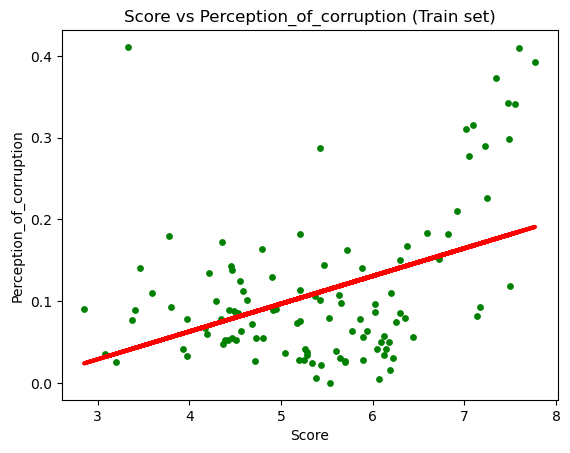

In [67]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Score vs Perception_of_corruption (Train set)')
plot_test.xlabel('Score')
plot_test.ylabel('Perception_of_corruption')
plot_test.show()

In [72]:
df_test = df_wh2019[df_wh2019['Perception_of_corruption'] <=0.40] 

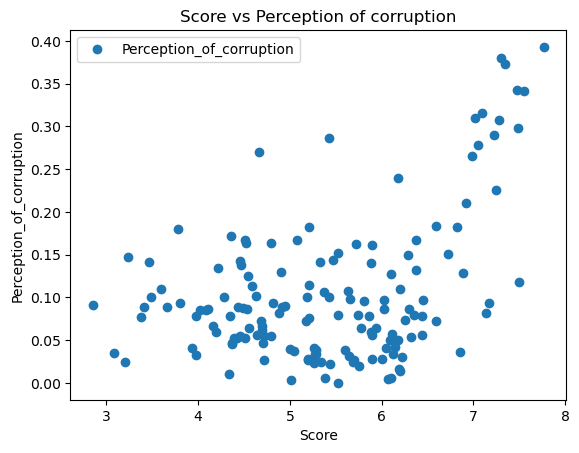

In [74]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Score', y='Perception_of_corruption', style='o')  
plt.title('Score vs Perception of corruption')  
plt.xlabel('Score')  
plt.ylabel('Perception_of_corruption')  
plt.show()

In [76]:
# Reshape again.
X_2 = df_test['Score'].values.reshape(-1,1)
y_2 = df_test['Perception_of_corruption'].values.reshape(-1,1)

In [78]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [80]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

The Training set shows a MSE of 7% and a RE of 17% which shows that there is a great correlation on the data set with the regression line. Hence the regression model is a better fit and is working for the training dataset. 